## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [2]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [3]:
df_train = pd.read_csv('Titanic_train.csv')

In [9]:
#計算每一行是否有遺失值，計算遺失比例
missing_vals = df_train.isnull().sum()/len(df_train)
missing_vals.sort_values(ascending=False)
missing_vals = pd.DataFrame(missing_vals,columns=['missing_rate'])
print(missing_vals)

             missing_rate
PassengerId      0.000000
Survived         0.000000
Pclass           0.000000
Name             0.000000
Sex              0.000000
Age              0.198653
SibSp            0.000000
Parch            0.000000
Ticket           0.000000
Fare             0.000000
Cabin            0.771044
Embarked         0.002245


## 觀察 Age

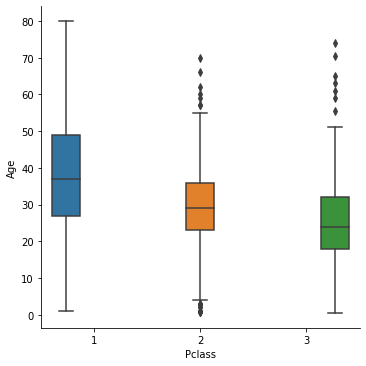

In [4]:
g = sns.catplot(x="Pclass", y="Age", hue="Pclass",
               data=df_train, kind="box")
# Pclass: 票務艙
# 越高等的普遍年齡越大，中位數亦是

/Users/chaoluchiao/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


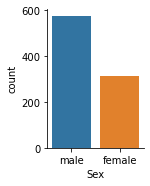

In [5]:
g = sns.catplot("Sex",
                data=df_train,
                kind="count", height=2.5, aspect=.8)
# 發現男性普遍多於女性

/Users/chaoluchiao/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


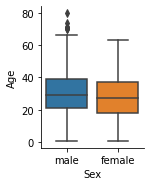

In [6]:
g = sns.catplot("Sex",'Age',
                data=df_train,
                kind="box", height=2.5, aspect=.8)
# 但男女性的年齡分佈與中位數並無相差太多，除了男性有些較年長之外

In [7]:
df2 = df_train[['Age', 'Pclass', 'Sex']]

In [8]:
# 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。

df2_train = df2.copy()
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df2_train['Sex'] = le.fit_transform(df2_train['Sex'])
display(df2_train)

value_neighbors = 3
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors)
df_filled = pd.DataFrame(imputer.fit_transform(df2_train))
#display(data[missing_index.values==True])
#display(df_filled[missing_index.values==True])
display(df_filled)

,Age,Pclass,Sex
0,22.0,3,1
1,38.0,1,0
2,26.0,3,0
3,35.0,1,0
4,35.0,3,1
...,...,...,...
886,27.0,2,1
887,19.0,1,0
888,NaN,3,0
889,26.0,1,1


,0,1,2
0,22.0,3.0,1.0
1,38.0,1.0,0.0
2,26.0,3.0,0.0
3,35.0,1.0,0.0
4,35.0,3.0,1.0
...,...,...,...
886,27.0,2.0,1.0
887,19.0,1.0,0.0
888,19.0,3.0,0.0
889,26.0,1.0,1.0
